In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import cv2
import os
import random as rd

In [2]:
direccion=r'C:\Users\Nicole\DataScience\Photos'
train=[]
test=[]
for i in os.listdir(direccion):
    file=os.path.join(direccion,i)
    label=i
    k=0
    for j in os.listdir(file):
        archivo=os.path.join(file,j)
        imagen=cv2.imread(archivo)
        imagen=cv2.resize(imagen, (600,800))
        if k<10:
            train.append([imagen,label])
            #plt.imshow(imagen)
            #plt.show()
            k+=1
            #break
        else :
            test.append([imagen,label])


In [3]:
rd.shuffle(train)
rd.shuffle(test)
X_train=[]
Y_train=[]
X_test=[]
Y_test=[]
for imagenes, etiquetas in train:
    X_train.append(imagenes.astype('float'))
    Y_train.append(int(etiquetas)-1)
for imagenes, etiquetas in test:
    X_test.append(imagenes.astype('float'))
    Y_test.append(int(etiquetas)-1)
X_train=np.array(X_train)
#X_train=X_train.reshape((-1,750,1000,3))
Y_train=np.array(Y_train)
X_test=np.array(X_test)
Y_test=np.array(Y_test)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


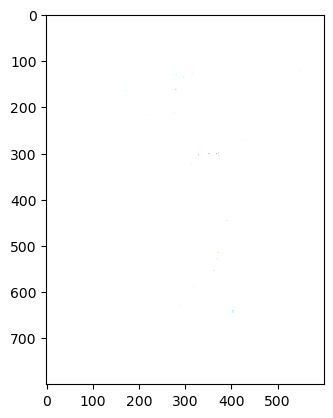

7


In [4]:
plt.imshow(X_train[5])
plt.show()
print(Y_train[5])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


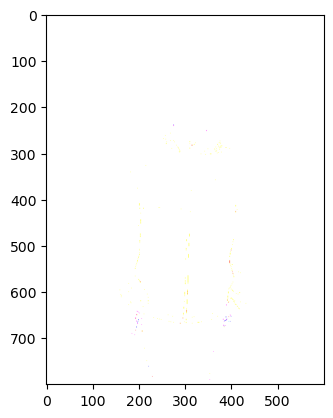

6


In [5]:
plt.imshow(X_test[4])
plt.show()
print(Y_test[4])

In [6]:
modelo=tf.keras.models.Sequential()
modelo.add(tf.keras.layers.Conv2D(50,(5,5),activation='relu'))
modelo.add(tf.keras.layers.MaxPooling2D((3,3),strides=2))
modelo.add(tf.keras.layers.Conv2D(50,(3,3),activation='relu'))
modelo.add(tf.keras.layers.MaxPooling2D((2,2),strides=2))
modelo.add(tf.keras.layers.Flatten())
modelo.add(tf.keras.layers.Dense(50,activation='relu', input_shape=(150,200,3)))          
modelo.add(tf.keras.layers.Dense(11,activation='softmax'))
modelo.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics='accuracy')
modelo.fit(X_train,Y_train ,epochs=1)

4/4 [==============================] - 56s 14s/step - loss: 12616.5195 - accuracy: 0.1000


In [7]:
modelo.fit(X_train,Y_train ,epochs=5)

Epoch 1/5
4/4 [==============================] - 179s 45s/step - loss: 2490.9702 - accuracy: 0.1400
Epoch 2/5
4/4 [==============================] - 297s 74s/step - loss: 575.4256 - accuracy: 0.1000
Epoch 3/5
4/4 [==============================] - 586s 146s/step - loss: 21.1177 - accuracy: 0.4200
Epoch 4/5
4/4 [==============================] - 52s 13s/step - loss: 1.4047 - accuracy: 0.8100
Epoch 5/5
4/4 [==============================] - 33s 8s/step - loss: 0.4366 - accuracy: 0.8900


In [8]:
modelo.evaluate(X_test,Y_test)

1/1 [==============================] - 0s 5ms/step - loss: 2.2409 - accuracy: 0.5333


[2.2408907413482666, 0.5333333611488342]

In [ ]:
modelo=tf.keras.models.Sequential()
modelo.add(tf.keras.layers.Conv2D(50,(10,10),activation='relu'))
modelo.add(tf.keras.layers.MaxPooling2D((3,3),strides=2))
modelo.add(tf.keras.layers.Conv2D(50,(5,5),activation='relu'))
modelo.add(tf.keras.layers.MaxPooling2D((2,2),strides=2))
modelo.add(tf.keras.layers.Flatten())
modelo.add(tf.keras.layers.Dense(150,activation='relu', input_shape=(600,800,3)))          
modelo.add(tf.keras.layers.Dense(11,activation='softmax'))
modelo.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics='accuracy')
modelo.fit(X_train,Y_train ,epochs=1)

In [ ]:
modelo.fit(X_train,Y_train ,epochs=5)

In [ ]:
modelo.evaluate(X_test,Y_test)

In [ ]:
X_test[0].shape

In [ ]:
imagen=X_test[0].reshape((-1,600,800,3))
np.argmax(modelo.predict(imagen)), modelo.predict(imagen), Y_test[0]

In [ ]:
for i in range(len(Y_test)):
    plt.imshow(X_test[i]/255)
    plt.show()
    imagen=X_test[i].reshape((-1,600,800,3))
    cont=0
    if np.argmax(modelo.predict(imagen))==Y_test[0]:
        cont=cont+1
    print(np.argmax(modelo.predict(imagen)), modelo.predict(imagen), Y_test[i])
print("Aciertos: ",cont/len(Y_test))